# Setup

In [123]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
from matplotlib import pyplot as plt
from PIL import Image
from pathlib import Path
import numpy as np
import cv2

In [239]:
from am.segment.image_utils import create_normalizer

In [240]:
def cut_patch(image, y_offset=0, x_offset=0, patch=1000):
    return image[y_offset:y_offset+patch, x_offset:x_offset+patch]

# Explore

In [211]:
source_path = Path('data/Mouse16_PFA_SlideN_sample/left/source/Well5/source.tiff')
tiles_path = Path('data/Mouse16_PFA_SlideN_sample/left/tiles/Well5/source')

In [195]:
tiles = []
tile_percentiles = []
for image_path in tiles_path.iterdir():
    tile = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    tiles.append(tile)
    tile_percentiles.append(np.percentile(tile, q=99))
tile_percentiles = np.array(tile_percentiles)

In [216]:
full_image = cv2.imread(str(source_path), cv2.IMREAD_GRAYSCALE)
a_min, a_max = np.percentile(full_image, q=1), np.percentile(full_image, q=99)
full_image.dtype, a_min, a_max

(dtype('uint8'), 49.0, 205.0)

In [217]:
# image = cut_patch(full_image, x_offset=300, patch=1000)
image = tiles[tile_percentiles.argmin()]
image.dtype

dtype('uint8')

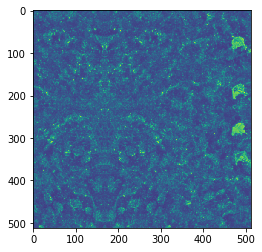

In [218]:
plt.imshow(image, vmin=0, vmax=255);

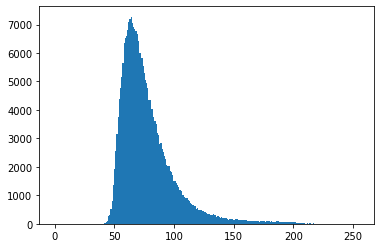

In [219]:
plt.hist(image.flatten(), bins=256, range=(0, 255));

In [220]:
image_norm = normalize(clip(image))
image_norm.dtype, image_norm.max()

(dtype('uint8'), 255)

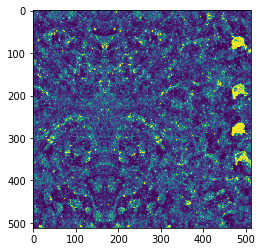

In [221]:
plt.imshow(image_norm, vmin=0, vmax=255)

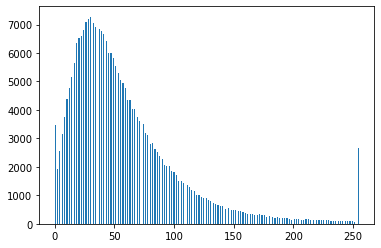

In [222]:
plt.hist(image_norm.flatten(), bins=256, range=(0, 255));

In [243]:
# image_global_norm = normalize(np.clip(image, a_min, a_max))
clip_normalize = create_normalizer(tiles_path)

In [244]:
image_global_norm = clip_normalize(image)
image_global_norm.dtype

dtype('uint8')

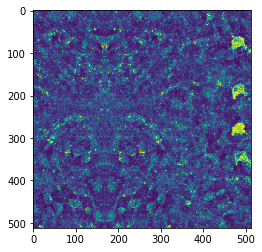

In [245]:
plt.imshow(image_global_norm, vmin=0, vmax=255)

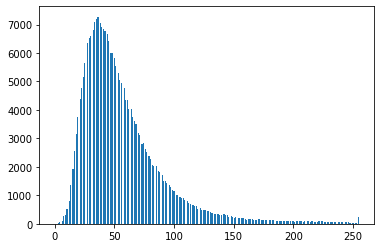

In [246]:
plt.hist(image_global_norm.flatten(), bins=256, range=(0, 255));

In [159]:
full_image_norm = normalize(clip(full_image))
full_image_norm.dtype

(dtype('uint8'), 255.0)

In [158]:
image_cut = cut_patch(full_image_norm, x_offset=300, patch=1000)
image_cut.dtype

(dtype('uint8'), 255.0)

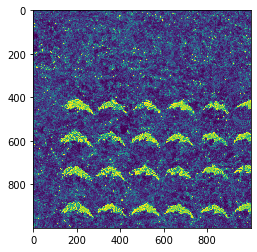

In [155]:
plt.imshow(image_cut, vmin=0, vmax=255)

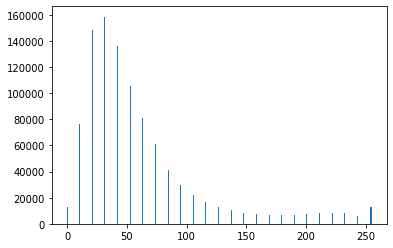

In [156]:
plt.hist(image_cut.flatten(), bins=256, range=(0, 255));

In [265]:
import torch
torch.__version__

'1.3.1'

In [266]:
from am.utils import load_model

In [267]:
model = load_model('model/unet-dan.pt')